In [173]:
import nplab.datafile as df
import os
import numpy as np
import sklearn.preprocessing as skpre
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import h5py
import scipy.signal as sig
import matplotlib.cm as cm
colours = cm.viridis(np.linspace(0,1,100)) 
import Alexsdatafuncs
datman = Alexsdatafuncs.data_manipulators()
from pandas import DataFrame
import peakutils

In [318]:
reload(Alexsdatafuncs)
datman = Alexsdatafuncs.data_manipulators()
alexplot = Alexsdatafuncs.plotting_funcs()

In [210]:
if 'hf' in globals():
    hf.close
    print "File closed"
elif 'data_f' in globals():
    data_f.close
else:
    pass

File closed


In [211]:
#There are two ways to open the file but both use h5py. If nplab.datafile is used the data is sorted automatically by
# timestamp, whereas h5py defaults to sort alphabetically

if 'hf' in globals():
    hf.close
    print "File closed"
else:
    pass

os.chdir('C:/Users/alexc/OneDrive - University of Cambridge/Documents/PhD Project/Projects')
data_f = df.open_file(set_current_bool=False, mode = 'r')
data_f.show_gui()
filoc = data_f.filename
data_f.close()

File closed
Cancelled by the user.


AttributeError: 'NoneType' object has no attribute 'show_gui'

In [212]:
# create or open an HDF5 file and open in read mode
if 'data_f' not in globals():
    hf = h5py.File('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\MAPbI3 perovskite nanoplatelets\\2018-12-14_NPoM.h5', 'r')
    #hf = h5py.File('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\Boron Nitride spacer\\Trilayer hBN\\2019-03-07_051118_tri2_80nmNPs.h5', 'r')
else:
    hf = h5py.File(filoc, 'r')
# open dark field data as an list hdf5 object
dfdata = hf.get('OceanOpticsSpectrometer')
# open image data as a list hdf5 object
imdata = hf.get('LumeneraCamera')

In [213]:
# set background, wavelength, reference and timestamp
dat0 = dfdata.get(dfdata.keys()[0])
numspec = len(dfdata.keys())
numpnts = len(dat0)
bgd = dat0.attrs['background']
wls = dat0.attrs['wavelengths']
ts = dat0.attrs['creation_timestamp']

In [214]:
# initialise matrix for dark field, timestamp and combined
dfmat = []
tsmat = []
dfmatwts = []

In [215]:
# Append into matrices the data with it properly referenced
i = 0
for i in range(0, numspec):
    temp = dfdata.get(dfdata.keys()[i])
    temparr = np.array(temp)
    dfield = (temparr - bgd) / (temp.attrs['reference'] - bgd)
    dfmat.append(df)
    ts = datetime.datetime.strptime(temp.attrs['creation_timestamp'][:19],
                                    "%Y-%m-%dT%H:%M:%S")
    dfwts = np.append(dfield, ts)  # append the timestamp to the end of the dataset
    dfmatwts.append(dfwts)
    #print dfdata.keys()[i]
    #print i

In [216]:
# If the data isn't already sorted by timestamp then this will sort it in this way
# sort by the end timestamp value and then delete the timestamp column

dfmatwts.sort(key=lambda row: row[-1:])

In [217]:
# Paste the threshold time from the gui into variable tsthreshold and this will split into seperate datasets

tsthreshold_1 = datetime.datetime.strptime("2018-12-14T15:16:21.966000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_2 = datetime.datetime.strptime("2018-12-14T15:19:37.976000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_3 = datetime.datetime.strptime("2018-12-14T15:33:05.018000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_4 = datetime.datetime.strptime("2018-12-14T15:37:39.032000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_5 = datetime.datetime.strptime("2018-12-14T15:41:12.044000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_6 = datetime.datetime.strptime("2018-12-14T18:02:38.487000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_7 = datetime.datetime.strptime("2018-12-14T18:22:28.549000", "%Y-%m-%dT%H:%M:%S.%f")
tsthreshold_8 = datetime.datetime.strptime("2018-12-14T18:24:58.557000", "%Y-%m-%dT%H:%M:%S.%f")
dfon = []
i=0
for i in range(0, len(dfmatwts)):
    if dfmatwts[i][-1] > tsthreshold_1 and dfmatwts[i][-1] < tsthreshold_2:
        dfon.append(dfmatwts[i])
    elif dfmatwts[i][-1] > tsthreshold_2 and dfmatwts[i][-1] < tsthreshold_3:
        dfon.append(dfmatwts[i])
    elif dfmatwts[i][-1] > tsthreshold_3 and dfmatwts[i][-1] < tsthreshold_4:
        dfon.append(dfmatwts[i])
    elif dfmatwts[i][-1] > tsthreshold_4 and dfmatwts[i][-1] < tsthreshold_5:
        dfon.append(dfmatwts[i])
    elif dfmatwts[i][-1] > tsthreshold_6 and dfmatwts[i][-1] < tsthreshold_7:
        dfon.append(dfmatwts[i])
    elif dfmatwts[i][-1] > tsthreshold_7 and dfmatwts[i][-1] < tsthreshold_8:
        dfon.append(dfmatwts[i])
    else:
        pass

dfonsorted = np.delete(dfon, -1, axis=1)

In [218]:
# Check for invalid values in data which can cause issues
i=0
count=0
for i in range(0, len(dfonsorted)-count - 1):
    if np.max(dfonsorted[i][100:800]*100) > 2:
        print np.max(dfonsorted[i][100:800]*100)
        dfonsorted = np.delete(dfonsorted, i, axis=0)
        count = count + 1
    else:
        pass

print count 

2.45407409145
20.6051897205
2


(410.0, 900.0)

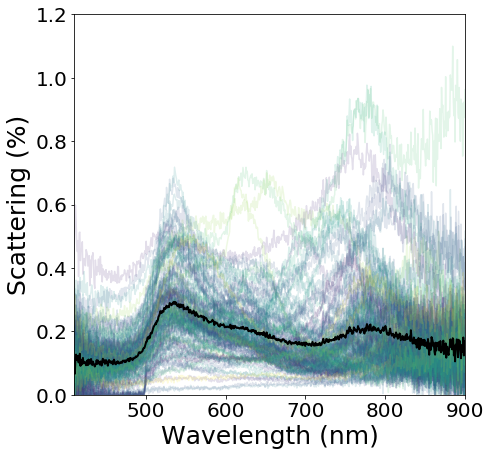

In [297]:
fig, ax, avdf_on = alexplot.plot_all_df(spectra=dfonsorted, wls=wls, colours=colours)
ax.set_ylim(0, 1.2)
ax.set_xlim()

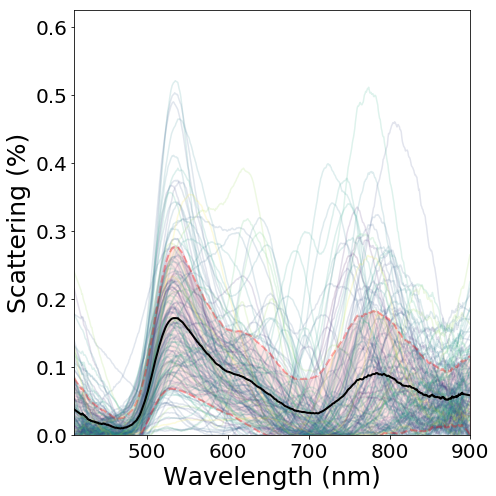

In [332]:
fig, ax, dfon_filt,avdf_on_filt, wls_cr = alexplot.plot_all_smooth_df(spectra=dfonsorted, wls=wls, colours=colours, baseline_subtract=True)
fig.tight_layout()
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\MAPbI3 perovskite nanoplatelets\\2018-12-14_NPoM analysis\\All_NPoM_smoothed.jpg', bbox='tight')

spectra same length


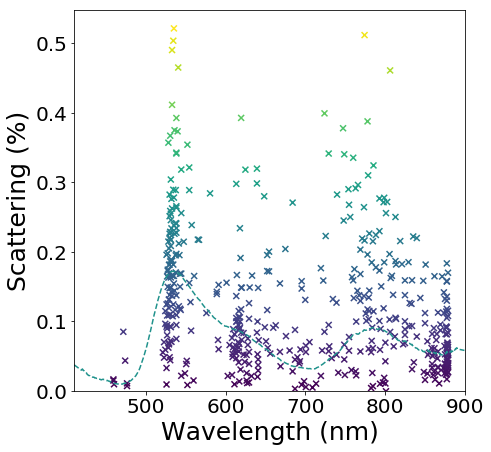

In [310]:
fig, ax, dfon_pk_wls, dfon_pk_intens, dfon_pk_indexes, dfon_pkwls_vec, dfon_pkints_vec, numpks_on  = alexplot.plot_all_peaks(spectra_filt=dfon_filt, wls_filt=wls_cr, colours=colours, threshold=0.2)

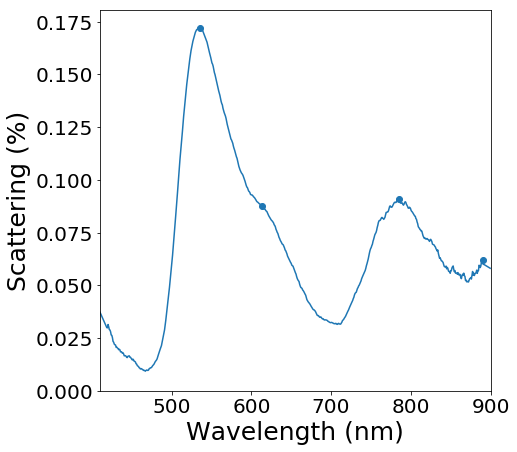

In [311]:
fig, ax, numpks = alexplot.fit_test(spectrum_filt=avdf_on_filt, wls_filt=wls_cr, threshold=0.3)

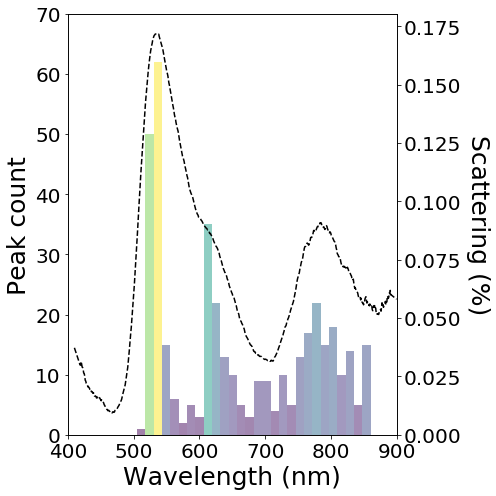

In [333]:
fig, ax = alexplot.peak_histogram(allpkwls=dfon_pkwls_vec, wls=wls_cr, colours=colours, av_spectrum=avdf_on_filt, ra=[480,860], bins=30)
fig.tight_layout()
fig.savefig('C:\\Users\\alexc\\OneDrive - University of Cambridge\\Documents\\PhD Project\\Projects\\MAPbI3 perovskite nanoplatelets\\2018-12-14_NPoM analysis\\All_NPoM_peak_hist.jpg', bbox='tight')

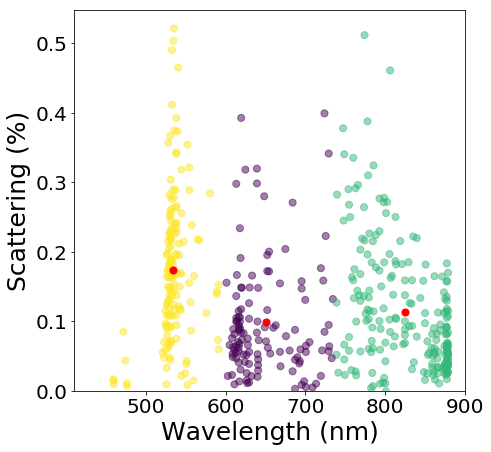

In [329]:
fig, ax, dframe, kmeans, centroids = alexplot.kmeans_pkplot(dfon_pkwls_vec, dfon_pkints_vec, n_clusters=4)

In [ ]:
centroids
